## TD 1 : Les installations sportives de Toulouse

### Contexte 

La mairie de Toulouse met à disposition des données ouvertes sur son territoire, par exemple des données sur ses installations sportives : https://data.toulouse-metropole.fr/explore/dataset/installations-sportives-de-la-ville-de-toulouse/information/?sort=-quartiers. 
L'objectif est d'analyser certaines de ces informations.
    
### 1. Fichier csv 

A partir de l'adresse précédente :
- visualiser le jeu de données, notamment les informations fournies
- télécharger le fichier au format csv
- l'ouvrir sous Excel pour supprimer les lignes dont le numéro de quartier est vide


### 2.  Dictionnaire données
Ecrire une fonction **initialiser_dico(nom_fichier:str)->dict** permettant de lire un fichier csv au format ci dessus. Cette fonction retourne un dictionnaire où chaque quartier est associé aux informations suivantes pour chaque installation sportive le concernant :
- Type
- Acces Hand
    
**Attention** : il peut y avoir plusieurs installations sportives pour un quartier ce qui donne par exemple pour le quartier 1.1 
    
    {'1.1': [{'Type': 'Salle rdc', 'Acces Hand': 'O'}, {'Type': 'Salle', 'Acces Hand': 'N'}, {'Type': 'Boulodrome', 'Acces Hand': ''}, {'Type': 'Boulodrome', 'Acces Hand': 'O'}, {'Type': 'Gymnase', 'Acces Hand': 'N'}, {'Type': 'Boulodrome', 'Acces Hand': 'O'}, {'Type': 'City stade', 'Acces Hand': 'N'}],
    

In [2]:
def initialiser_dico(nom_fichier: str) -> dict:
    return get_dico_by_keys(nom_fichier, ['Type', 'Acces Hand'])

def get_dico_by_keys(nom_fichier: str, list_keys: list = None):
    lines = get_file_lines(nom_fichier)

    keys = get_csv_keys(lines)

    liste_quartiers = {}

    for i in range(1, len(lines)):
        data_dict = create_dict(lines[i], keys)
        no_quartier = data_dict[keys[0]]
        if (liste_quartiers.get(no_quartier) is None):
            liste_quartiers[no_quartier] = []

        current_dict = {
            'Quartiers' : data_dict[keys[0]],
            'Sites' : data_dict[keys[1]],
            'Adresse' : data_dict[keys[2]],
            'Type' : data_dict[keys[3]],
            'Activités (nombre)' : data_dict[keys[4]],
            'Nature' : data_dict[keys[5]],
            'L x l x h' : data_dict[keys[6]],
            'Eclairage' : data_dict[keys[7]],
            'Arrosage' : data_dict[keys[8]],
            'Vest joueurs (Arbitres)' : data_dict[keys[9]],
            'Sanitaires' : data_dict[keys[10]],
            'Douches' : data_dict[keys[11]],
            'Capacité sécurité' : data_dict[keys[12]],
            'Tribunes' : data_dict[keys[13]],
            'Club House' : data_dict[keys[14]],
            'Catégorie' : data_dict[keys[15]],
            'Date' : data_dict[keys[16]],
            'Acces Hand' : data_dict[keys[17]],
            'Toilette Hand' : data_dict[keys[18]],
        }
        
        if (list_keys is None):
            temp_dict = current_dict
        else:
            temp_dict = {}
            for key in list_keys:
                temp_dict[key] = current_dict[key]

        liste_quartiers[no_quartier].append(temp_dict)

    return liste_quartiers

def create_dict(line: str, keys: list) -> dict:
    """Conversion d'une ligne vers un format exploitable de Film

    Args:
        line (str): La ligne
        keys (list): La liste de clés

    Returns:
        dict: Film
    """
    donnees = line.split(';')

    data = {}

    for i in range(len(donnees)):
        data[keys[i]] = donnees[i]

    return data

def get_file_lines(csv_file_path: str) -> list:
    """Implémentation de la récupération des lignes d'un fichier sans \n

    Args:
        csv_file_path (str): Le chemin vers le fichier CSV

    Returns:
        list: La liste des lignes
    """
    
    with open(csv_file_path, encoding='UTF-8', mode='r') as file:
        lines = file.readlines()
    
    response = []

    for line in lines:
        response.append(line.replace("\n", "").strip())

    return response

def get_csv_keys(lines: list) -> list:
    """Permet de récupérer la liste des champs

    Args:
        lines (list): Les lignes du fichier CSV

    Returns:
        list: La liste des champs
    """
    return lines[0].split(';')


if (__name__ == '__main__'):
    
    csv_file = 'installations-sportives-de-la-ville-de-toulouse.csv'
    print(initialiser_dico(csv_file))


{'4.2': [{'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Gymnase', 'Acces Hand': 'O'}, {'Type': 'Patinoire, piscine', 'Acces Hand': 'O'}, {'Type': 'Gymnase', 'Acces Hand': 'O'}, {'Type': 'Gymnase', 'Acces Hand': 'O'}, {'Type': 'Plateau multisports extérieur', 'Acces Hand': 'O'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Boulodrome', 'Acces Hand': 'O'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Boulodrome', 'Acces Hand': 'O'}, {'Type': 'Dojo', 'Acces Hand': 'O'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Plateau multisports extérieur', 'Acces Hand': 'N'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Boulodrome', 'Acces Hand': 'O'}, {'Type': 'Boulodrome', 'Acces Hand': 'O'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Plateau multisports extérieur', 'Acces Hand': 'O'}, {'Type': 'Boulodrome', 'Acces Hand': 'N'}, {'Type': 'Terrain', 'Acces Hand': 'O'}, {'Type': 'Plateau mult

### 3.  Indicateur d'accessibilité
Ecrire une fonction **accessibilite(dico:dict)->dict** qui a partir du dictionnaire ci dessus va générer un nouveau dictionnaire indiquant pour chaque quartier :
- son nombre d'équipements
- son nombre d'équipements non accessibles aux personnes en situation de handicap
    
Par exemple, {'4.2': [26,3] } indique que dans le quartier 4.2, il y a 26 équipements dont 3 non accessibles
    
La fonction affiche le(s) quartier(s) qui a(ont) le plus grand nombre d'équipements non accessibles et renvoie le dictionnaire généré.

In [3]:
def accessibilite(dico: dict) -> dict:
    equipements_inaccessibles = non_accessibles(dico)

    list_return = {}
    nb_max_inaccessibles = nb_max_equipement_inaccessibles(dico)
    list_max_equipements_inaccessibles = []

    for key, values in dico.items():
        list_return[key] = [
            len(values),
            equipements_inaccessibles[key]
        ]

        if (equipements_inaccessibles[key] == nb_max_inaccessibles):
            list_max_equipements_inaccessibles.append(key)

    print("Voici la liste des quartiers ayant le plus grand nombre d'équipements non accessibles : {}".format(list_max_equipements_inaccessibles))
    return list_return

def nb_max_equipement_inaccessibles(dico: dict):
    equipements_inaccessibles = non_accessibles(dico)

    nb_max = None

    for quartier, nb in equipements_inaccessibles.items():
        if (nb_max is None or nb > nb_max):
            nb_max = nb

    return nb_max

def non_accessibles(dico: dict) -> dict:
    """Retourne un dictionnaire contenant pour chaque quartier le nombre d'équipements non accessibles

    Args:
        dico (dict): Le dictionnaire d'entrée

    Returns:
        dict: Le dictionnaire de sortie
    """

    list_return = {}
    for key, list_equipements in dico.items():
        list_return[key] = 0

        for equipement in list_equipements:
            if (equipement['Acces Hand'] == 'N'):
                list_return[key] += 1

    return list_return


if __name__ == '__main__':
    csv_file = 'installations-sportives-de-la-ville-de-toulouse.csv'
    dico = initialiser_dico(csv_file)
    print(accessibilite(dico))

Voici la liste des quartiers ayant le plus grand nombre d'équipements non accessibles : ['4.2', '2.4', '2.1', '1.1', '6.2']
{'4.2': [26, 3], '5.2': [29, 2], '5.1': [19, 0], '5.3': [31, 1], '3.4': [14, 2], '2.4': [9, 3], '2.3': [8, 2], '2.1': [6, 3], '4.1': [10, 0], '4.3': [15, 2], '6.3': [12, 0], '6.4': [2, 0], '1.1': [7, 3], '3.2': [3, 1], '3.1': [12, 2], '6.5': [2, 1], '2.2': [1, 1], '1.2': [5, 0], '6.2': [7, 3], '1.3': [3, 2], '3.3': [5, 0], '6.1': [2, 1]}


Afficher dans un graphique le dictionnaire d'accessibilité avec en abscisse les numéros de quartier et en ordonné le nombre d'équipement.

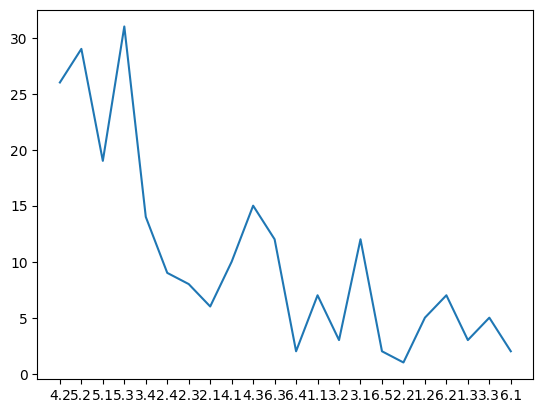

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

if __name__ == '__main__':
    csv_file = 'installations-sportives-de-la-ville-de-toulouse.csv'
    dico = initialiser_dico(csv_file)
    x_data = dico.keys()
    y_data = []
    for key, values in dico.items():
        y_data.append(len(values))

    ax.plot(x_data, y_data)
    plt.show()   

### 4.  Dictionnaire type d'équipement
Ecrire une fonction **types equipements(dico:dict)->dict** qui, à partir du dictionnaire des données de la question 2, va retourner un dictionnaire indiquant le nombre d'équipements par type d'équipement. Ce calcul se fait pour l'ensemble des quartiers. Par exemple, il y a 1 seul équipement de type "Salle rdc" dans la ville mais 64 de type "Boulodrome"
    
    {'Salle rdc': 1, 'Salle': 6, 'Boulodrome': 64, ... }

In [5]:
def type_equipements(dico: dict) -> dict:
    dico_equipements = {}

    for key, values in dico.items():
        for equipement in values:
            type_equip = equipement['Type']
            if (dico_equipements.get(type_equip) is None):
                dico_equipements[type_equip] = 0
            
            dico_equipements[type_equip] += 1
    return dico_equipements

if __name__ == '__main__':
    
    csv_file = 'installations-sportives-de-la-ville-de-toulouse.csv'
    dico = initialiser_dico(csv_file)
    
    response = type_equipements(dico)
    print(response)
            


{'Terrain': 60, 'Gymnase': 31, 'Patinoire, piscine': 1, 'Plateau multisports extérieur': 21, 'Boulodrome': 64, 'Dojo': 2, 'City stade': 5, 'Salle': 6, 'Patinoire': 1, 'City-Stade': 4, 'Tennis': 4, 'Piscine': 11, 'Skate-park': 1, 'Base nautique': 3, 'Fronton': 1, 'Terrain sable': 1, 'bi-cross, skate-park': 1, 'Salle polyvalente': 1, 'Multisports': 4, 'bi-cross': 1, 'Skate-Park': 2, 'Piste': 2, 'Salle rdc': 1}


Enregistrer ce dictionnaire dans un fichier **types_equipements.txt** avec un équipement par ligne sous la forme **nom : valeur**. Par exemple :
    
    Salle rdc:1
    Salle:6
    Boulodrome:64 ...


In [6]:

def write_equipements_csv(equipements: dict, filename: str):
    """Implémentation de l'écriture d'une liste d'equipements dans un fichier

    Args:
        films (dict): Liste des equipements
        filename (str): Nom du fichier
    """
    with open(filename, encoding='utf-8', mode='w+') as file:
        file.write("nom:valeur")

    for nom, valeur in equipements.items():
        line = f"{nom}:{valeur}"

        with open(filename, encoding='utf-8', mode='a+') as file:
            file.write("\n" + line)

if __name__ == '__main__':
    
    csv_file = 'installations-sportives-de-la-ville-de-toulouse.csv'
    dico = initialiser_dico(csv_file)
    
    response = type_equipements(dico)

    write_equipements_csv(response, 'types_equipements.txt')

    

    
### 5.  Accès par quartier
Ecrire une fonction **installations_quartier(nom_fichier:str,num_quartier:str)** permettant de lire le fichier csv pour écrire dans un nouveau fichier nommé installations-sportives-quartier-num.csv l'ensemble des installations du numéro de quartier choisi. L'ensemble des informations sont copiées ainsi que la première ligne descriptive.
        
        
**Attention**: installations-sportives-quartier-**1-1**.csv contiendra les installations du quartier **1.1** pour éviter un problème de nommage de fichier.

In [20]:
def installations_quartier(nom_fichier: str, num_quartier: str):
    """Implémentation de la réponse à la question

    Args:
        nom_fichier (str): Le nom du fichier à récupérer les données
        num_quartier (str): Le quartier à chercher
    """
    dico_quartiers = get_dico_by_keys(nom_fichier)

    quartier = get_by_quartier_name(dico_quartiers, num_quartier)

    lines_quartier = get_lines_from_quartier(quartier)
    
    keys = get_csv_keys(get_file_lines(nom_fichier))

    write_quartier_csv_file(lines_quartier, keys, num_quartier)

def write_quartier_csv_file(lines_quartier: list, keys: list, num_quartier: str, filename: str = None):
    """Écrit dans un fichier csv les équipements d'un quartier'

    Args:
        lines_quartier (list): La liste des équipements d'un quartier
        keys (list): Les clés du fichier CSV
        num_quartier (str): Le numéro du quartier concerné
        filename (str, optional): Le nom du fichier à créer. Defaults to None.
    """
    if (filename is None):
        num_quartier = num_quartier.replace('.', '-')
        filename = f"installations-sportives-quartier-{num_quartier}.csv"

    with open(filename, encoding='utf-8', mode='w+') as file:
        file.write(';'.join(keys))

    for line in lines_quartier:

        with open(filename, encoding='utf-8', mode='a+') as file:
            file.write("\n" + ';'.join(line))

def get_lines_from_quartier(dico: dict) -> list:
    """Récupération des lignes d'un quartier

    Args:
        dico (dict): _description_

    Returns:
        list: _description_
    """
    lines = []
    for num, quartiers in dico.items():
        for quartier in quartiers:
            temp_quartier = get_quartier_values(quartier)
            lines.append(temp_quartier)

    return lines
        
def get_quartier_values(quartier: dict) -> list:
    """Récupération des valeurs d'un quartier sous forme de liste

    Args:
        quartier (dict): Un quartier en particulier

    Returns:
        list: La liste des valeurs
    """
    values = []
    for key, value in quartier.items():
        values.append(value)
    
    return values

def get_by_quartier_name(dico: dict, nom: str) -> dict:
    """Récupération d'un quartier à partir d'un nom

    Args:
        dico (dict): Dictionnaire des quartiers
        nom (str): Nom du quartier à chercher

    Returns:
        dict: Le quartier trouvé
    """
    for key, value in dico.items():
        if (nom == key):
            return {
                key: value
            }
    
    return None

if (__name__ == '__main__'):
    csv_file = 'installations-sportives-de-la-ville-de-toulouse.csv'
    installations_quartier(csv_file, '1.1')


{'1.1': [{'Quartiers': '1.1', 'Sites': 'Fabre salle rdc', 'Adresse': '5 rue du Pont de Tounis', 'Type': 'Salle rdc', 'Activités (nombre)': 'Musculation', 'Nature': '', 'L x l x h': '14,70x8,50', 'Eclairage': '', 'Arrosage': '', 'Vest joueurs (Arbitres)': '2', 'Sanitaires': 'oui', 'Douches': 'collective', 'Capacité sécurité': '31', 'Tribunes': '', 'Club House': '', 'Catégorie': '5ème', 'Date': '', 'Acces Hand': 'O', 'Toilette Hand': 'N'}, {'Quartiers': '1.1', 'Sites': 'Barada gymnase', 'Adresse': '1 Rue Malbec', 'Type': 'Salle', 'Activités (nombre)': 'Gymnastique', 'Nature': '', 'L x l x h': '25 x 11.5 x 4.85', 'Eclairage': '', 'Arrosage': '', 'Vest joueurs (Arbitres)': '2', 'Sanitaires': '1', 'Douches': '3 individuelle', 'Capacité sécurité': '50 pers', 'Tribunes': '', 'Club House': '', 'Catégorie': '5 ème', 'Date': '', 'Acces Hand': 'N', 'Toilette Hand': 'N'}, {'Quartiers': '1.1', 'Sites': 'Daurade', 'Adresse': 'Quai de la Daurade', 'Type': 'Boulodrome', 'Activités (nombre)': '', 'Natu

### Pour aller plus loin
- Réfléchir à la complexité de vos algorithmes et voir s’ils ne peuvent pas être optimisés en allocation mémoire ou temps d'exécution.
- Imaginer d'autres indicateurs qui pourraient servir dans le cadre d'une gestion des équipements sportifs de la ville

In [ ]:
- O(N²) à minimat
- Ajouter également une courbe des équipements inaccessibles

## [Home](0_Index.ipynb)🏠
![licence.png](pics/licence.png) Licence Creative Commons Attribution - Partage dans les Mêmes Conditions 4.0 International